In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chisquare
sns.set_style('darkgrid')
# максимум столбцов при выводе
pd.options.display.max_columns = 1000
data = pd.read_excel('dataset.xlsx')

# удаление дубликатов
cols = data.columns.delete(0)
data.loc[data.duplicated(subset=cols)]
data = data.drop_duplicates(subset=cols)

# делаем название столбцов с заглавной буквы
data.columns.array[0:10] = pd.Index(map(str.title, data.columns.array[0:10]))

In [531]:
# удаляем столбцы, в которых нет значений
data.dropna( how='all', axis=1, inplace = True)
# удаляем столбец без названия
del data['Unnamed: 31']

In [532]:
# исправляем ошибки ввода данных 
data['ВИЧ-инфекция'] = data['ВИЧ-инфекция'].replace('да (ст IV Б)', 'да (IV Б стадия)')
data['ВИЧ-инфекция'] = data['ВИЧ-инфекция'].replace('да (ст V)', 'да (V стадия)')
data['ВИЧ-инфекция'] = data['ВИЧ-инфекция'].replace('да (ст IV В)', 'да (IV В стадия)')
data['ВИЧ-инфекция'].value_counts()

data['Курение стаж'] = data['Курение стаж'].replace('да', None)

# пустые клетки заменяем на "неизвестно "
data = data.fillna('неизвестно')

In [533]:
# therapy_completed = data[data['Лечение прервано'] == 'По согласованию с врачом']
# therapy_not_completed = data[data['Лечение прервано'] != 'По согласованию с врачом']
# refused = data[data['Лечение прервано'] == 'да/отказ']
# leave = data[data['Лечение прервано'] == 'да/самовольный уход']

therapy_completed = data[(data['Лечение завершено (стационарный этап)'] == 'да')]
therapy_not_completed = data[data['Лечение завершено (стационарный этап)'] == 'нет']



In [534]:
womens = data[data['Пол'] == 'ж'].get(['Номер', 'Пол'])
mens = data[data['Пол'] == 'м'].get(['Номер', 'Пол'])

In [535]:

# max_day_therapy = data[data['К/Дней'] == max(data['К/Дней'])] ??????????????????
max_day_therapy = data[data['К/Дней'] == max(data['К/Дней'])].get(['Номер', 'К/Дней'])
min_day_therapy = data[data['К/Дней'] == min(data['К/Дней'])].get(['Номер', 'К/Дней'])


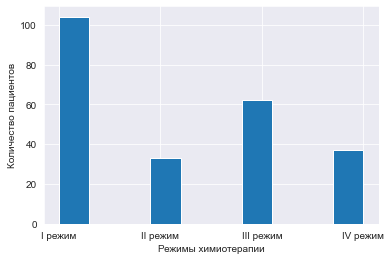

In [536]:
plt.hist(therapy_completed['Режимы химиотерапии'])
plt.xlabel('Режимы химиотерапии')
plt.ylabel('Количество пациентов')
plt.show()


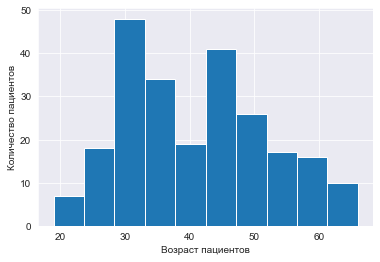

In [537]:
# гистограмма по возрасту
plt.hist(therapy_completed['Возраст'])
plt.xlabel('Возраст пациентов')
plt.ylabel('Количество пациентов')
plt.show()

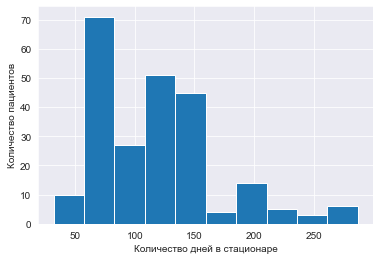

In [538]:
plt.hist(therapy_completed['К/Дней'])
plt.xlabel('Количество дней в стационаре')
plt.ylabel('Количество пациентов')
plt.show()

In [539]:
chisqt = pd.crosstab(data['Пол'], data['Лечение завершено (стационарный этап)'], margins=True)
value = np.array([chisqt.iloc[0][0:3].values,
                  chisqt.iloc[1][0:3].values])

print(chi2_contingency(value))
print(value)
chisqt

(0.9582886847498581, 0.6193130851193503, 2, array([[ 86.00888889,  77.99111111, 164.        ],
       [149.99111111, 136.00888889, 286.        ]]))
[[ 91  73 164]
 [145 141 286]]


Лечение завершено (стационарный этап),да,нет,All
Пол,,,
ж,91,73,164
м,145,141,286
All,236,214,450
